# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [9]:
import pandas as pd
import numpy as np

dfa = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')

dfa.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#1

dfa['Price'].head(15)

dfa['Price'].dtype

dfa['Price_clean'] = (
    dfa['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
)

dfa['Price_clean'] = pd.to_numeric(dfa['Price_clean'], errors='coerce')

dfa['Price_clean'].isna().sum()

#The price column was originally stored as an object due to formatting like commas 
# (ex 1,112) and dollar signs. I removed these non numeric characters using string replacement and 
# then converted the column to numeric using pd.to_numeric(..., errors='coerce'), which converts 
# invalid values to NaN. After cleaning, I counted the number of missing values using .isna().sum(), and it
# was 0, so it seems like that column was cleaned well.

#2




np.int64(0)

In [28]:
#2

dfm = pd.read_csv('data/mn_police_use_of_force.csv')

dfm['subject_injury'].dtype

dfm['subject_injury'].isna().sum() # theres 9848 of these...

len(dfm['subject_injury']) # out of 12925 total cases - so 9848/12925 is the proportion

dfm['subject_injury'].dropna() # now objects, length 3077, drops nans

dfm['injury_clean'] = dfm['subject_injury'].fillna('Missing')

pd.crosstab(dfm['injury_clean'], dfm['force_type'])

pd.crosstab(
    dfm['injury_clean'],
    dfm['force_type'],
    normalize='columns'
)

# looking at the patterns where data is missing, there were some pretty interesting things that stuck out
#less lethal had 100% data missing, maximal restraint had 100% missing, chemical irr had 89% missing
# taser had 75% missing, bodily force had 75% missing - while others like Firearm have 0% missing. 
#This shows maybe that the missingness isnt random and is likely related to differences in reporting 
# practices across diff force types

dfm['subject_injury'] = dfm['subject_injury'].fillna('Missing')



In [ ]:
#3

dfb = pd.read_csv('data/metabric.csv')

dfb['Overall Survival Status'].unique() # check what the values are called now

dfb['OSS_dummy'] = dfb['Overall Survival Status'].map({
    '0:LIVING': 1,
    '1:DECEASED': 0
}) # changed it to respective 1s and 0s

dfb = dfb.drop(columns=['Overall Survival Status'])

dfb[['OSS_dummy']].head()

dfb.head() # show updated data 




,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,OSS_dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,YES,5.230071,31.0,4.0,0


In [ ]:
#4

dfn = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')

# counting missing vals
missing_count = dfn['Review Scores Rating'].isna().sum()
print("number of missing values is - ", missing_count)

# comp median
median_score = dfn['Review Scores Rating'].median()

# impute median
dfn['Review_Scores_Rating_imputed'] = dfn['Review Scores Rating'].fillna(median_score)

# check all that
print(dfn[['Review Scores Rating', 'Review_Scores_Rating_imputed']].head(10))
print("missing after imputation - ", dfn['Review_Scores_Rating_imputed'].isna().sum())

# imputing the median replaces all missing values with the same media score which reduces 
# variability and assumes that missing ratings are “average.”/the same -  This can bias the dataset, hide 
# real patterns that wouldve been there otherwise, and might distort relationships between review 
# scores and other variables



number of missing values is -  8323
   Review Scores Rating  Review_Scores_Rating_imputed
0                   NaN                          94.0
1                   NaN                          94.0
2                   NaN                          94.0
3                   NaN                          94.0
4                  96.0                          96.0
5                 100.0                         100.0
6                 100.0                         100.0
7                  94.0                          94.0
8                  90.0                          90.0
9                  96.0                          96.0
missing after imputation -  0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

year range-  0.0 to 2026.0
      Year  Count
0   1940.0     24
1   1941.0     27
2   1942.0     41
3   1943.0     28
4   1944.0     31
..     ...    ...
82  2022.0     98
83  2023.0    109
84  2024.0     52
85  2025.0     66
86  2026.0     11

[87 rows x 2 columns]


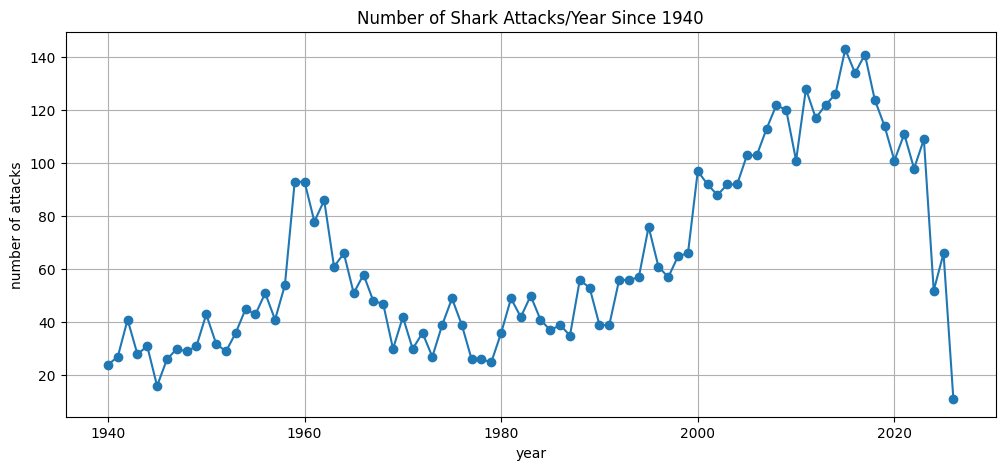

In [ ]:
#1 -  when I downloaded the dataset, there was a paywall, so I had to manually convert it to csv before being able to
# save it because I don't have a microsoft subscription, so I wasn't able to edit/save the original version
# I directly saved it to drive where I then just downloaded it as a csv to this directory

#2
df = pd.read_csv('data/sharksitedata.csv')
df = df.replace(r'^\s*$', pd.NA, regex=True) # making sure formatting is right so empty cells all affected

df = df.dropna(axis=0, how='all') # droppin empty rows and cols
df = df.dropna(axis=1, how='all')
df.head() # show new df

# 3 - This was a MESSY dataframe, there were many columns that were fully empty/unlabeled. 
# An observation is a single row in a dataset that represents one instance of the thing/event being studied 
# in this case, its one shark attack. I treated each row as an observation and kept all columns that contained any meaningful 
# info about it, while dropping unlabeled columns that were completely empty. This made sire that each observation is 
# fully represented by its relevant data which helps prevent noise or errors from affecting further data exploration

# 4

# print("og year values - ") # just looking at all unique values
# print(df['Year'].unique())

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

year_min = df['Year'].min() # checking the range of values i see
year_max = df['Year'].max()
print(f"year range-  {year_min} to {year_max}")

df_1940 = df[df['Year'] >= 1940]

attacks_per_year = df_1940.groupby('Year').size().reset_index(name='Count')

print(attacks_per_year)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5)) # trying to look at trends over time if theres increase or not
plt.plot(attacks_per_year['Year'], attacks_per_year['Count'], marker='o')
plt.title('Number of Shark Attacks/Year Since 1940')
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.grid(True)
plt.show() #ok, there seems to be an increase over time until 2020, when there looks to be a sharp/rapid drop, also notable peak in 1960 and 2018ish
# overall looks like an increase over time

original age values-
[13. nan 39. 11. 27. 12. 56. 55. 24. 26. 25. 61. 40. 14. 50. 54. 48. 57.
  8. 63.]
count    3928.000000
mean       28.189664
std        14.684872
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64


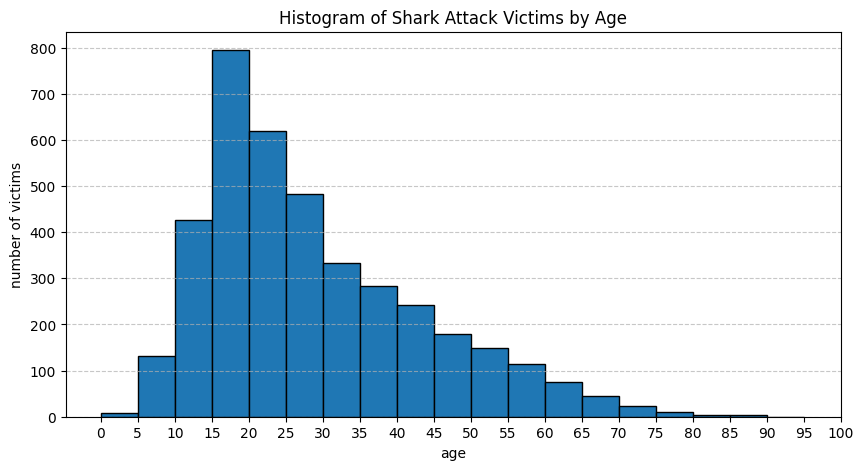

In [99]:
# 5

print("original age values-")
print(df['Age'].unique()[:20]) # check what it looks like

# convert to numeric, coerce errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

#drop rows where Age is missing to keep only valid ages for the histogram
df_age = df.dropna(subset=['Age'])

# descirbe
print(df_age['Age'].describe())

# historgam
plt.figure(figsize=(10,5))
plt.hist(df_age['Age'], bins=range(0, 100, 5), edgecolor='black')  # 5 year bins
plt.title('Histogram of Shark Attack Victims by Age')
plt.xlabel('age')
plt.ylabel('number of victims')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [103]:
# 6
# unique stuff to know what to fix
print("original type values-")
print(df['Type'].unique())

# clean it up
df['Type_clean'] = df['Type'].astype(str).str.strip().str.capitalize()  # remove extra stuff

# put Unknown in for other stuff
df['Type_clean'] = df['Type_clean'].replace({
    'Invalid': 'Unknown', 
    'Nan': 'Unknown', 
    '': 'Unknown', 
    '?': 'Unknown', 
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Under investigation': 'Unknown',
    'Watercraft': 'Unknown',
    'Sea disaster': 'Unknown',
    'Boat': 'Unknown',
    'Questionable': 'Unknown', 
    'Unkown': 'Unknown'
})

# keep only specific categories
df['Type_clean'] = df['Type_clean'].where(df['Type_clean'].isin(['Provoked', 'Unprovoked', 'Unknown']), 'Unknown')

# check counts/ proportions
type_counts = df['Type_clean'].value_counts()
type_proportions = df['Type_clean'].value_counts(normalize=True)

print("Counts are-\n", type_counts)
print("\nproportions-\n", type_proportions)

# proportion of unprovoked
unprovoked_prop = type_proportions.get('Unprovoked', 0)
print(f"\nproportion of attacks that are unprovoked- {unprovoked_prop:.2%}") 
# note - unknown could add to this, or to provoked (take w grain of salt)


original type values-
['Unprovoked' 'Provoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
Counts are-
 Type_clean
Unprovoked    5225
Unknown       1204
Provoked       644
Name: count, dtype: int64

proportions-
 Type_clean
Unprovoked    0.738725
Unknown       0.170225
Provoked      0.091050
Name: proportion, dtype: float64

proportion of attacks that are unprovoked- 73.87%


In [102]:
# 7

# clean up all text from messy stuff
df['Fatal_clean'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()

# mapping
df['Fatal_clean'] = df['Fatal_clean'].replace({
    'Y': 'Y',
    'Y X 2': 'Y', 
    'N': 'N',
    'N ': 'N',
    ' N': 'N',
    'NQ': 'N',
    'F': 'N', 
    'M': 'N', 
    'UNKNOWN': 'Unknown',
    'NAN': 'Unknown',
    '2017': 'Unknown',
    '': 'Unknown',
    'Y': 'Y',
    'y': 'Y', 
    'n': 'N'  
})

df.loc[~df['Fatal_clean'].isin(['Y', 'N']), 'Fatal_clean'] = 'Unknown' # else unknown

# check
print(df['Fatal_clean'].value_counts())
print(df['Fatal_clean'].value_counts(normalize=True))



Fatal_clean
N          4950
Y          1490
Unknown     633
Name: count, dtype: int64
Fatal_clean
N          0.699844
Y          0.210660
Unknown    0.089495
Name: proportion, dtype: float64


In [ ]:
# 8

# cross tab to relate
fatal_by_type = pd.crosstab(df['Type_clean'], df['Fatal_clean'])

print("Counts of Fatal Y/N by Type:\n", fatal_by_type)

fatal_by_type_prop = pd.crosstab(df['Type_clean'], df['Fatal_clean'], normalize='index')
print("\nproportion of fatal Y/N by type-\n", fatal_by_type_prop)

# fatality rate quick look
fatal_rate = fatal_by_type_prop['Y']
print("\nfatality rate by attack type-\n", fatal_rate)

# this shows that unprovoked attacks are more fatal than provoked attacks (again, could be altered by the unknown col, maybe they didnt know cus the people died)
# this seems to make sense logically, because a provoked attack would likely happen in an area where a human is in control, whereas unprovoked
# could indicate shark was already dangerous/agressive or human wasn't expecting the incident, therefore not in control

Counts of Fatal Y/N by Type:
 Fatal_clean     N  Unknown     Y
Type_clean                      
Provoked      615        8    21
Unknown       452      551   201
Unprovoked   3883       74  1268

proportion of fatal Y/N by type-
 Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.954969  0.012422  0.032609
Unknown      0.375415  0.457641  0.166944
Unprovoked   0.743158  0.014163  0.242679

fatality rate by attack type-
 Type_clean
Provoked      0.032609
Unknown       0.166944
Unprovoked    0.242679
Name: Y, dtype: float64


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1 - The abstract
The paper is about a specific part of data cleaning called data tidying, organizing datasets into a standard tidy structure where each variable is a column and  each observation is a row and each type of observational unit is a table- It says that this structure makes data easier to manipulate/model/visualize, and allows a small set of tools to handle many diff messy datasets, illustrated with a case study
​
2 - The intro
The tidy data standard is intended to give a consistent way to organize data values within a dataset so you do not have to kind of “reinvent the wheel” every time you clean new data, tt is designed to 1. make initial cleaning and exploration easier and 2. simplify building data analysis tools that work well together by inputting and outputting data in the same standard structure while avoiding repeated “munging' between tools
​
3 - looking at the sentences

Sentence 1- “Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”

This means that once data are tidy, they all share the same basic structure (variables as columns/observations as rows/observational units as tables), regardless of content- In contrast, messy datasets can violate this structure in many different ways, so there is no single shape for messy data
​
Sentence 2-  “For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”

For one concrete dataset, peolple can usually look at it and decide which parts should be treated as variables and which as should be observations. But if you try to give a general, formal def that covers all possible cases (ex, when columns could instead be levels of another variable, like home phone vs work phone), it becomes hard to define universally/overall what counts as a variable or an observation
​

4 - defs of values, variables, and observations

In section 2.2 Wickham defines these as...

Values- individual pieces of data- each cell entry is a value, usually a number (quantitative) or string (qualitative)

Variables- collections of all values that measure the same underlying attribute (ex, height, temperature) across units

Observations- collections of all values measured on the same unit (ex, one person, one day) across attributes
​
he illustrates this by reorganizing Table 1 into Table 3, showing 18 values forming three variables (person, treatment, result) and six observations (each person–treatment combination).


5 - 
“Tidy data is a standard way of mapping the meaning of a dataset to its structure.” A dataset is tidy when:
​
Each variable forms a column, each observation forms a row, each type of observational unit forms a table- any other arrangement (violating these three rules) is considered messy
​

6 - 

a) Five most common problems with messy datasets
five common problems - 
​
- column headers are values, not variable names.
- Multiple variables are stored in one column
- Variables are stored in both rows and columns.
- multiple types of observational units are stored in the same table
- A single type of observational unit is stored in multiple tables
​

b) Why the data in Table 4 are messy
In table 4 (religion vs income), the incone categories appear as col headers, but they are actually values of the “income” variable. That means column headers are being used to store values instead of being variable names, violating the tidy rule that each variable should be a column and each observation a row
​

c) what is melting a dataset?
Melting is the operation that turns such wide data into a long (molten) form by converting a set of columns into two columns- one that stores the former column names (now values of a variable) and one that stores the corresponding data values. Genrerally, you: Specify “colvars” (columns that are already variables and should be kept as is), then...
Convert all other columns into... a new variable (typically called column, then renamed like income) holding the repeated original column headers, a value column holding the stacked data.the result is a molten dataset which can then be made fully tidy by renaming and maybe further splitting columns
​

7 -

a) Why Table 11 is messy

Table 11  is messy for a few reasons-
​
- Variables stored in both rows and columns-
The element column holds names of variables (tmin, tmax) instead of being a value of a variable, so the type of measurement (min vs max temperature) is stored in rows
​- The day of month appears across many columns (d1–d31), so “day” is also stored in column positions.
- so, some variables (day, type of measurement) are encoded in both row and column structure rather than as their own columns, violating tidy data principles
​

b) why table 12 is tidy and molten
First, the data are melted:

Columns d1–d31 are turned into a “date or day” variable plus a value column- id, year, month, and element are treated as colvars- This gives Table 12(a), which is the molten form, where each row has id, date, element, and a single value column. then, they cast that molten data- The element variable (with values tmax, tmin) is turned back out into two columns tmax and tmin, with one row per id/date combo.
​
In Table 12(b), each column corresponds to one variable (id, date, tmax, tmin), and each row corresponds to one obs. (one day’s measurements at a station), so it meets all three tidy rules
​
So...

- Table 11 is messy because measurement type and day are encoded structurally (in rows and columns) rather than as variables.
- Table 12(a) is a molten version of the weather data, after melting
​- Table 12(b) is tidy because variables are in columns, each days measurements form a row and the observational unit (daily measurements for a station) defines the table
​

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

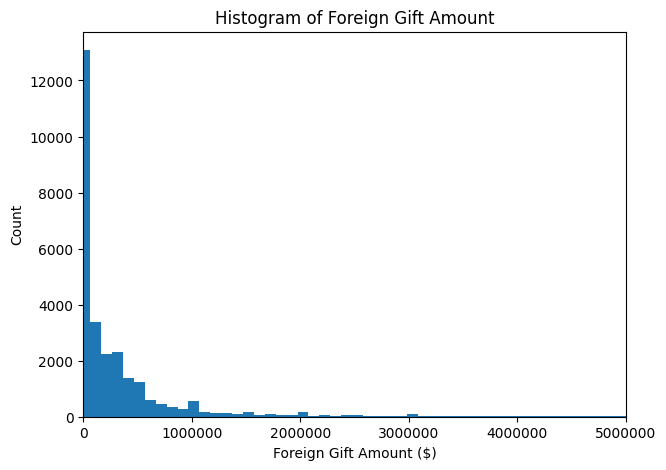

               Count  Proportion
Gift Type                       
Contract       17274    0.612097
Monetary Gift  10936    0.387513
Real Estate       11    0.000390
top 15 countries by number of gifts-

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

top 15 countries by total gift amount-

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA              

In [ ]:
#1

df = pd.read_csv('data/ForeignGifts_edu.csv')

df.head()

#2
plt.figure(figsize=(7,5))
plt.hist(df['Foreign Gift Amount'].dropna(), bins=1000)

plt.ticklabel_format(style='plain', axis='x')  # 👈 key line

plt.xlabel("Foreign Gift Amount ($)")
plt.ylabel("Count")
plt.title("Histogram of Foreign Gift Amount")
plt.xlim(0, 5_000_000)

plt.show()

# based on the plot, seems like the majority of gifts are lower, I altered the x axis to get closer
# to the lower values, and highly the most common is less than 5 million, with a minor spike at 10 mil,
# and decreasing steadily after that, so the major majority of gifts are under 10 mil

# 3

counts = df['Gift Type'].value_counts()

props = df['Gift Type'].value_counts(normalize=True)

table = pd.DataFrame({
    'Count': counts,
    'Proportion': props
})

print(table) # see table for proportions

# 4

top_count = (
    df['Country of Giftor']
        .value_counts()
        .head(15)
)

print("top 15 countries by number of gifts-\n") # england was top in number
print(top_count)

top_amount = (
    df.groupby('Country of Giftor')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

print("\ntop 15 countries by total gift amount-\n") # qatar was top in total amount
print(top_amount)



Top 15 institutions by total amount received-

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: in

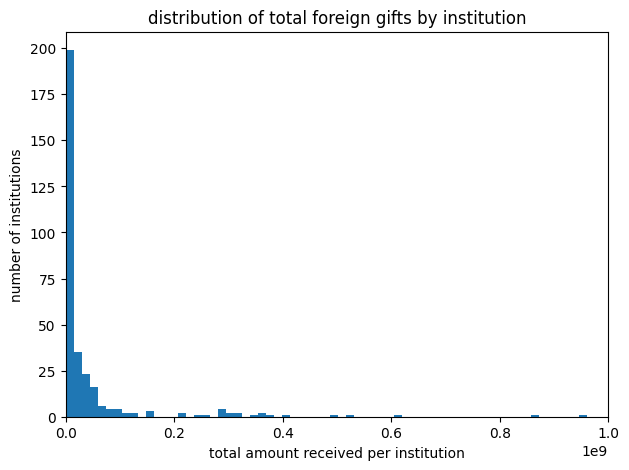

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64
                                 Giftor  Total Amount Given
0                      Qatar Foundation          1166503744
1   Qatar Foundation/Qatar National Res           796197000
2        Qatar Fou

In [ ]:
# 5

# t15 by total amount recieved (no uva sad)
top15 = (
    df.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

print("Top 15 institutions by total amount received-\n")
print(top15)

# hist
totals = (
    df.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
)

plt.figure(figsize=(7,5))
plt.hist(totals.dropna(), bins=100)

plt.xlabel("total amount received per institution")
plt.ylabel("number of institutions")
plt.title("distribution of total foreign gifts by institution")

plt.xlim(0, 1_000_000_000)

plt.show()

# 6 lil top gifters table (qatar foundation is top)

top_giftors = (
    df.groupby('Giftor Name')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
)

print(top_giftors.head(15))
top_giftors_df = top_giftors.head(15).reset_index()

top_giftors_df.columns = ['Giftor', 'Total Amount Given']

print(top_giftors_df)


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

shape- (3798, 63)
observations (rows)- 3798
variables (cols)- 63
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


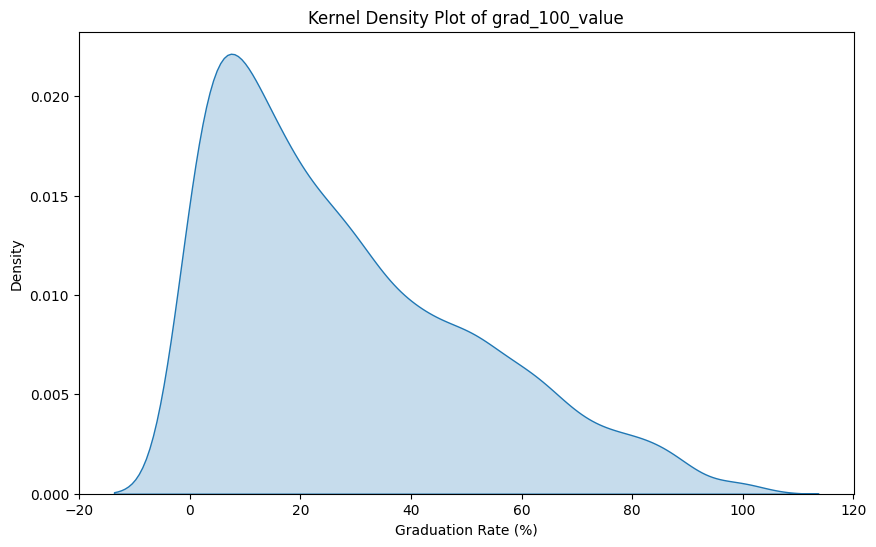

Overall grad_100_value summary:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


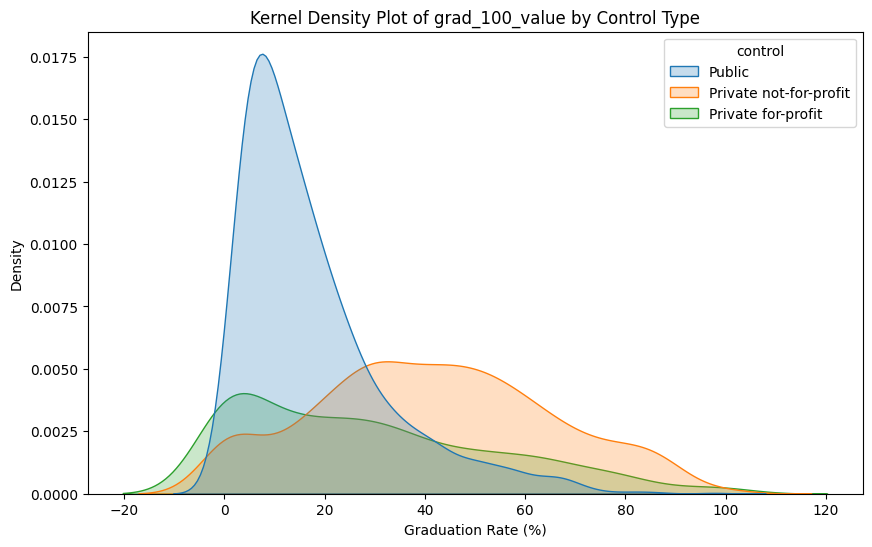


grad_100_value summary by control:

Control: Public
count    1499.000000
mean       17.430887
std        14.729443
min         0.000000
25%         6.900000
50%        13.200000
75%        23.250000
max        97.800000
Name: grad_100_value, dtype: float64

Control: Private not-for-profit
count    1189.000000
mean       41.660976
std        23.551231
min         0.000000
25%        25.000000
50%        41.000000
75%        58.300000
max       100.000000
Name: grad_100_value, dtype: float64

Control: Private for-profit
count    779.000000
mean      29.108858
std       25.601687
min        0.000000
25%        6.950000
50%       24.700000
75%       46.750000
max      100.000000
Name: grad_100_value, dtype: float64


In [ ]:
# 1
df = pd.read_csv('data/college_completion.csv')

# 2
print("shape-", df.shape)
print("observations (rows)-", df.shape[0]) # 3798 rows/observations
print("variables (cols)-", df.shape[1]) # 63 cols/variables

df.head()

# 3
control_level_ct = pd.crosstab(df['control'], df['level'])

print(control_level_ct)
# there are more 4-year private not for profit, and private 4 
# year over all than two year, however, more 2 year public - more private observed in the data overall

#4
import seaborn as sns
# overall kernel density plot
plt.figure(figsize=(10,6))
sns.kdeplot(df['grad_100_value'].dropna(), fill=True)
plt.title("Kernel Density Plot of grad_100_value")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

# describe table overall
print("Overall grad_100_value summary:")
print(df['grad_100_value'].describe())

# kernel density plots conditioned on contr.
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title("Kernel Density Plot of grad_100_value by Control Type")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

# decr tables by control
print("\ngrad_100_value summary by control:")
for ctrl in df['control'].dropna().unique():
    print(f"\nControl: {ctrl}")
    print(df.loc[df['control'] == ctrl, 'grad_100_value'].describe())

# most favorable grad rate seems to be private not for profit, having highest avg grad rate overall


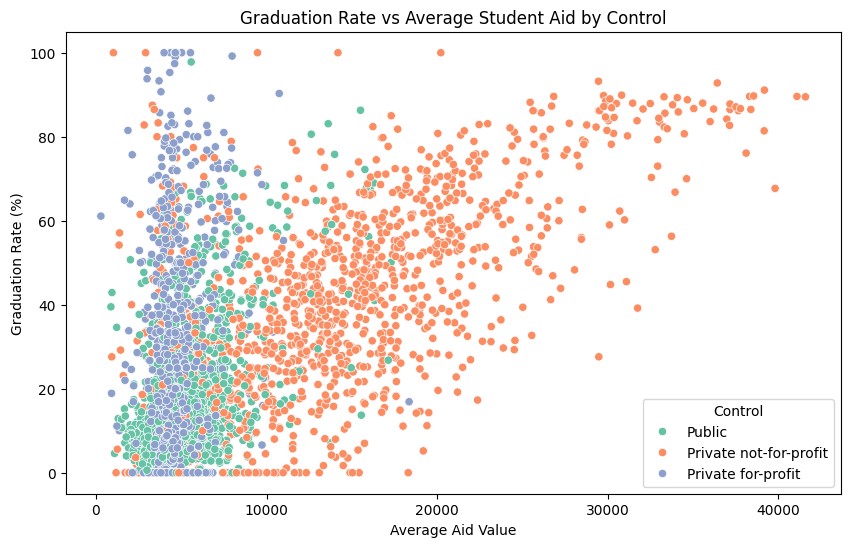

Covariance for all- 88610.48
Correlation for all- 0.58



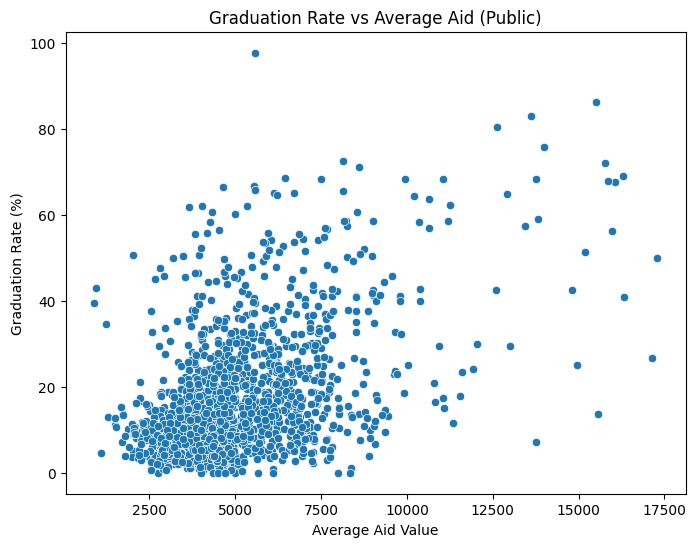

Control: Public
  Covariance: 15355.15
  Correlation: 0.48



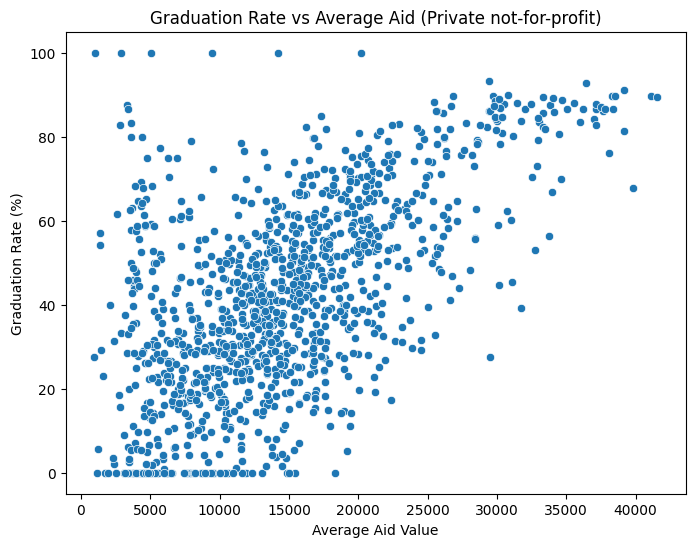

Control: Private not-for-profit
  Covariance: 109274.12
  Correlation: 0.60



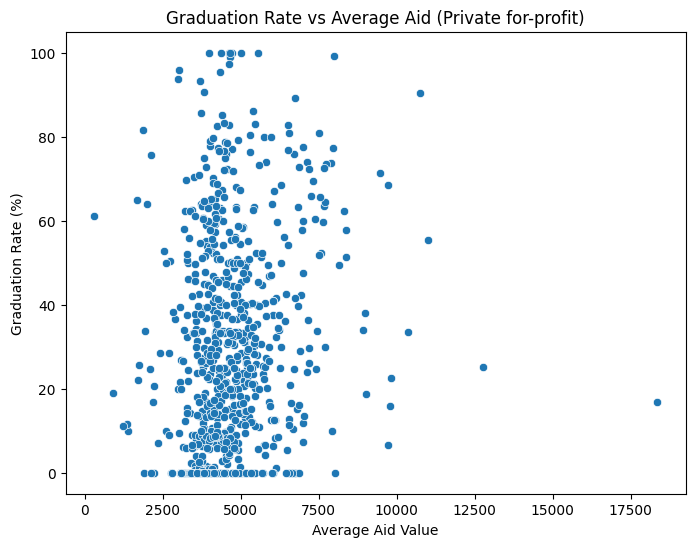

Control: Private for-profit
  Covariance: 6897.52
  Correlation: 0.19



In [ ]:
# 5 
# scatterplot and stats for all instit.
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='aid_value',
    y='grad_100_value',
    hue='control',
    palette='Set2'
)
plt.title('Graduation Rate vs Average Student Aid by Control')
plt.xlabel('Average Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Control')
plt.show()

#generally seems like the higher the aid value, the higher the graduation rate for both,
# private not for profit by far gives most aid, with private for profit giving the least, 
# trend seems to allude to aid increase leading to grad increase 

# covariance and correlation for all institutions
cov_all = df[['aid_value', 'grad_100_value']].cov().iloc[0,1]
corr_all = df[['aid_value', 'grad_100_value']].corr().iloc[0,1]

print(f"Covariance for all- {cov_all:.2f}")
print(f"Correlation for all- {corr_all:.2f}\n")

# scatterplots and stats by control
for ctrl in df['control'].unique():
    subset = df[df['control'] == ctrl]
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=subset,
        x='aid_value',
        y='grad_100_value',
        color='C0'
    )
    plt.title(f'Graduation Rate vs Average Aid ({ctrl})')
    plt.xlabel('Average Aid Value')
    plt.ylabel('Graduation Rate (%)')
    plt.show()

    cov_ctrl = subset[['aid_value', 'grad_100_value']].cov().iloc[0,1]
    corr_ctrl = subset[['aid_value', 'grad_100_value']].corr().iloc[0,1]
    
    print(f"Control: {ctrl}")
    print(f"  Covariance: {cov_ctrl:.2f}")
    print(f"  Correlation: {corr_ctrl:.2f}\n")

    # for private for non profit, aid seems to have the most positive effect on graduation rates


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [148]:
df = pd.read_csv('data/ames_prices.csv')
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


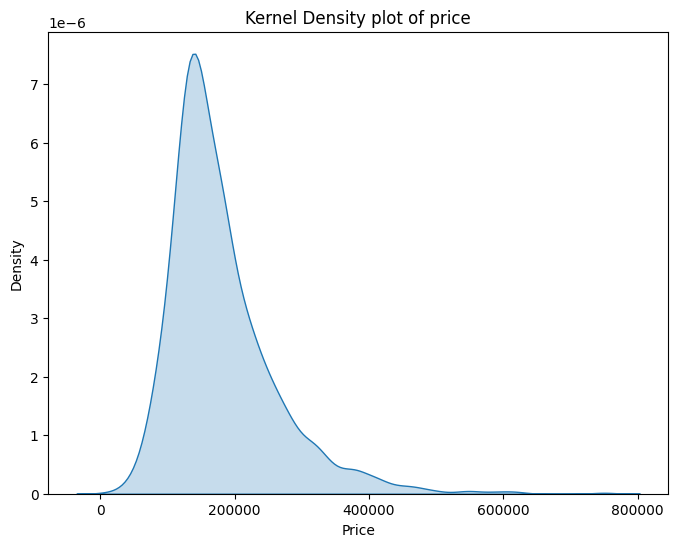

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


/var/folders/xj/pd7w9qz52gq4znklqy7h1rqh0000gn/T/ipykernel_82417/2902357765.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/xj/pd7w9qz52gq4znklqy7h1rqh0000gn/T/ipykernel_82417/2902357765.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='building type')


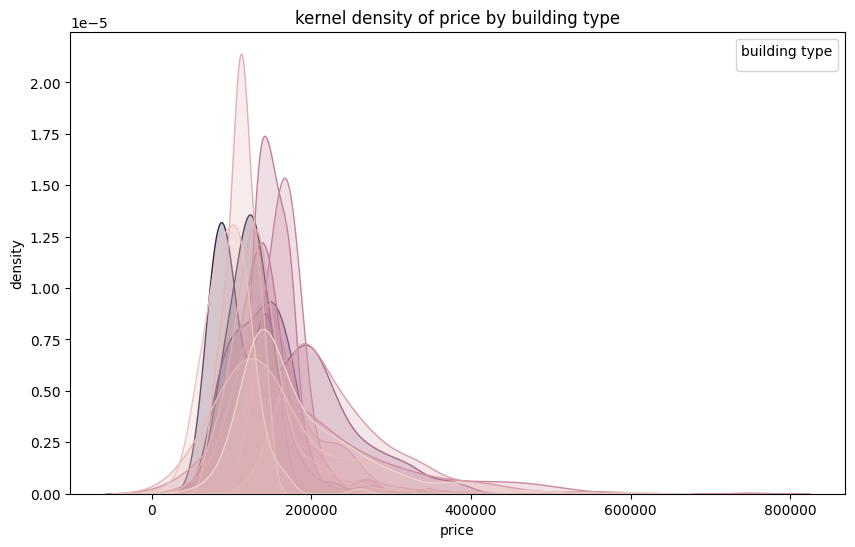

Price stats by building type-

              count           mean           std       min       25%  \
MS.SubClass                                                            
20           1079.0  187355.694161  83193.460647   13100.0  132125.0   
30            139.0   96726.920863  31093.452537   12789.0   79450.0   
40              6.0  144916.666667  61826.706743   79500.0  114625.0   
45             18.0  111783.333333  17815.401466   76000.0  103775.0   
50            287.0  137432.912892  46556.212255   37900.0  113500.0   
60            575.0  239364.285217  82702.035324  129000.0  184825.0   
70            128.0  156526.164062  52756.757820   40000.0  123875.0   
75             23.0  199978.260870  99219.623043  101000.0  130750.0   
80            118.0  168009.364407  33437.407244  100000.0  148000.0   
85             48.0  149841.666667  21683.875599   70000.0  134800.0   
90            109.0  139808.935780  39498.973534   61500.0  118858.0   
120           192.0  208018.91145

In [ ]:
# 1
df = pd.read_csv('data/ames_prices.csv')

df.head()
# 2
price_clean = df['price'].dropna()

plt.figure(figsize=(8,6))
sns.kdeplot(price_clean, fill=True)
plt.title('Kernel Density plot of price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

print(price_clean.describe())

# next step

df_clean = df.dropna(subset=['price', 'MS.SubClass'])
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_clean, 
    x='price', 
    hue='MS.SubClass', 
    fill=True,
    common_norm=False
)
plt.title('kernel density of price by building type')
plt.xlabel('price')
plt.ylabel('density')
plt.legend(title='building type')
plt.show()

grouped_stats = df_clean.groupby('MS.SubClass')['price'].describe()
print("Price stats by building type-\n")
print(grouped_stats)

mean_price = grouped_stats['mean'].sort_values(ascending=False)
var_price = grouped_stats['std'].sort_values(ascending=False)

print("\nmost expensive build types by mean price-")
print(mean_price.head(5))

print("\nbuilding types with highest price variance (std)-")
print(var_price.head(5))

# most expensive on average are MS.SubClass 120 and MS.SubClass 60 - highest variance were subclass
# 75 and 20, with MS.SubClass 75 – std ≈ 99,220 and MS.SubClass 20 – std ≈ 83,193

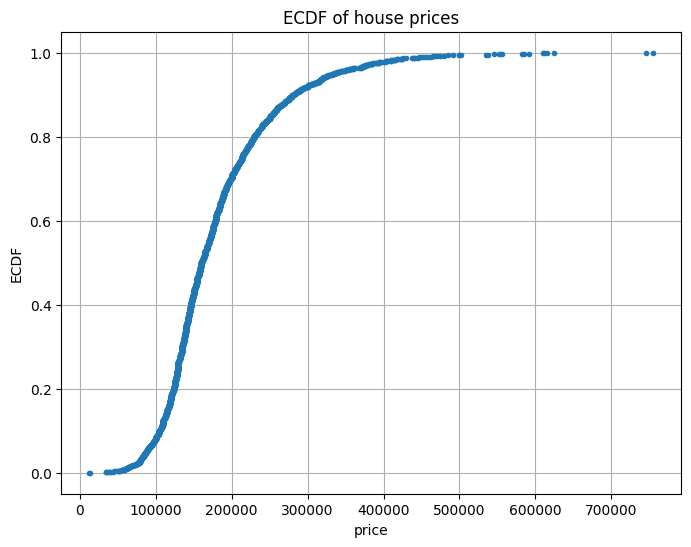

5num summary of price-
Min- 12789
25 percentile (Q1)- 129500.0
Median- 160000.0
75 percentile (Q3): 213500.0
Max- 755000


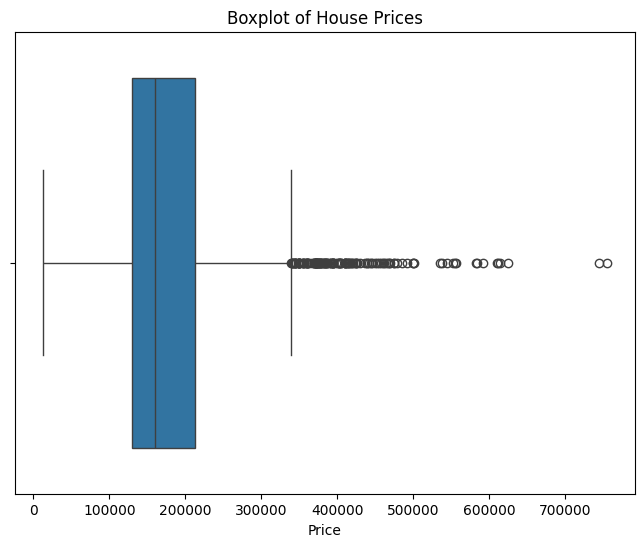

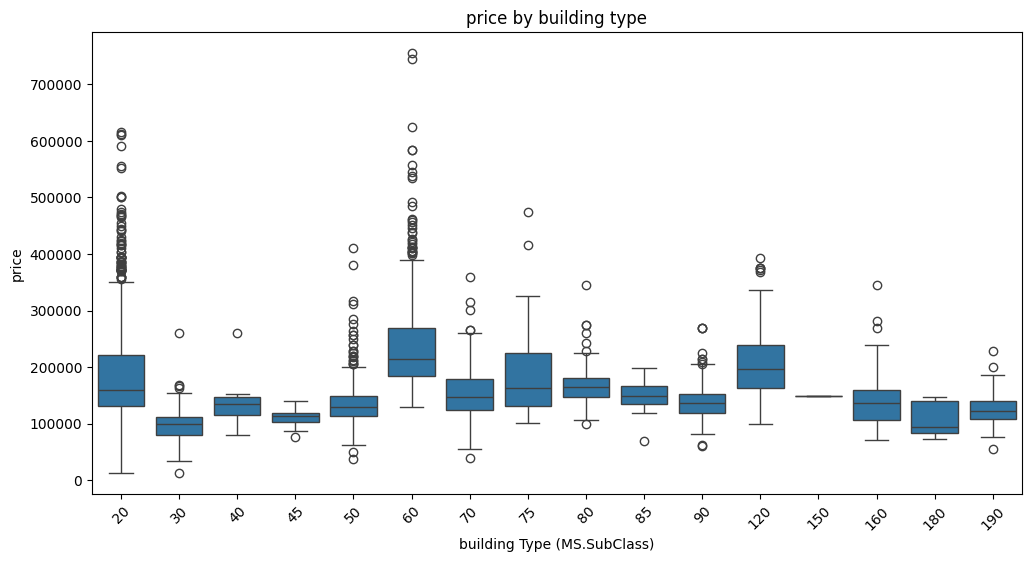

In [ ]:
# 3 

price_sorted = np.sort(df['price'].dropna())
n = len(price_sorted)
ecdf = np.arange(1, n+1) / n

plt.figure(figsize=(8,6))
plt.plot(price_sorted, ecdf, marker='.', linestyle='none')
plt.xlabel('price')
plt.ylabel('ECDF')
plt.title('ECDF of house prices')
plt.grid(True)
plt.show()

min_price = price_sorted.min()
q1 = np.percentile(price_sorted, 25)
median = np.median(price_sorted)
q3 = np.percentile(price_sorted, 75)
max_price = price_sorted.max()

print("5num summary of price-")
print(f"Min- {min_price}")
print(f"25 percentile (Q1)- {q1}")
print(f"Median- {median}")
print(f"75 percentile (Q3): {q3}")
print(f"Max- {max_price}")

# 4 

plt.figure(figsize=(8,6)) # yes, there seems to be a decently high number of outliers based on the plot
sns.boxplot(x=df['price'])
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='MS.SubClass', y='price', data=df)
plt.title('price by building type')
plt.xlabel('building Type (MS.SubClass)')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

# patterns - most outliers tend to always be higher prices than average, rarely being lower
# types 20 and 60 look to have the most and the highest outliers, many more than the other types
# theres not a huge range between the building types and median/Q1-Q3 prices, generally look to be comparable

    price  Price_outlier
0  215000              0
1  105000              0
2  172000              0
3  244000              0
4  189900              0
5  195500              0
6  213500              0
7  191500              0
8  236500              0
9  189000              0

number of outliers- 137


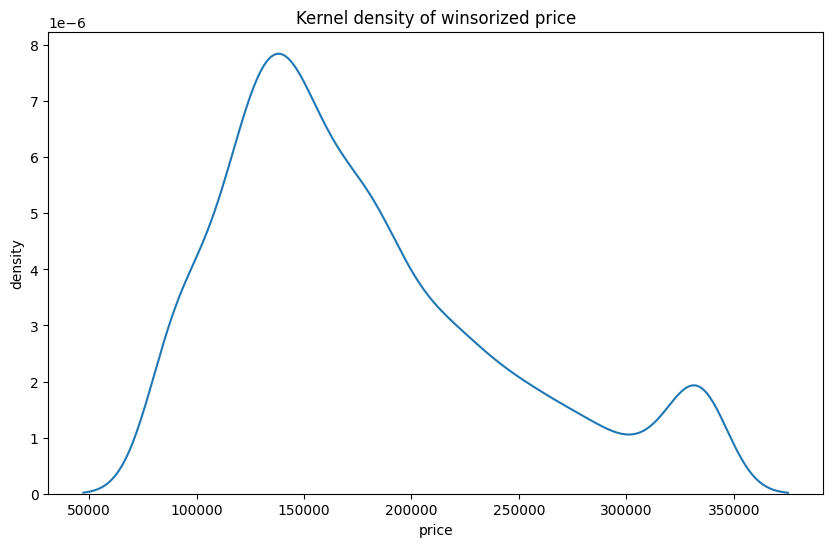

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: Price_winsor, dtype: float64


In [ ]:
# 5

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Price_outlier'] = ((df['price'] < lower_bound) | (df['price'] > upper_bound)).astype(int)

# Check
print(df[['price', 'Price_outlier']].head(10))
print("\nnumber of outliers-", df['Price_outlier'].sum())

# 6

lower_percentile = 0.05
upper_percentile = 0.95

lower_bound = df['price'].quantile(lower_percentile)
upper_bound = df['price'].quantile(upper_percentile)

df['Price_winsor'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(10,6))
sns.kdeplot(df['Price_winsor'])
plt.title('Kernel density of winsorized price')
plt.xlabel('price')
plt.ylabel('density')
plt.show()
print(df['Price_winsor'].describe())

# changes from before
# max decreased significantly, min also increased (outliers getting bounded), while the rest generally stayed the same
# seems like overall better outlier handling while keeping the data untainted